In [1]:
import numpy as np
min_seq = 8

#Change the path to your downloaded SHREC2017 dataset
dataset_fold = "/media/evan/200190f7-facf-4549-8fd2-\
7b90bba8f11a/evan/Documents/handGesture/pointlstm_\
gesture_recognition_pytorch/dataset/SHREC2017"

In [2]:
def parse_file(data_file,data_cfg):
    label_list = []
    all_data = []
    for line in data_file:
        data_ele = {}
        data = line.split() #【id_gesture， id_finger， id_subject， id_essai， 14_labels， 28_labels size_sequence】
        #video label
        if data_cfg == 0:
            label = int(data[4])
        elif data_cfg == 1:
            label = int(data[5])
        label_list.append(label) #add label to label list
        data_ele["label"] = label
        #video
        video = []
        joint_path = dataset_fold + "/gesture_{}/finger_{}/subject_{}/essai_{}/skeletons_world.txt".format(data[0],data[1],data[2],data[3])
        joint_file = open(joint_path)
        for joint_line in joint_file:
            joint_data = joint_line.split()
            joint_data = [float(ele) for ele in joint_data]#convert to float
            joint_data = np.array(joint_data).reshape(22,3)#[[x1,y1,z1], [x2,y2,z2],.....]
            joint_data = np.delete(joint_data, 1, axis=0)
            video.append(joint_data)
        while len(video) < min_seq:
            video.append(video[-1])
        data_ele["skeleton"] = video
        data_ele["name"] = line
        all_data.append(data_ele)
        joint_file.close()
    return all_data, label_list

In [3]:
train_path = dataset_fold + "/train_gestures.txt"
train_file = open(train_path)

In [4]:
train_data, train_label = parse_file(train_file,data_cfg=0)

In [5]:
temp = []
for datum in train_data:
    video = datum['skeleton']
    for frame in video:
        temp.append(frame)

In [21]:
train_data[0]

{'label': 1,
 'skeleton': [array([[ 0.34482252, -0.34951989,  0.456735  ],
         [ 0.3301959 , -0.33732601,  0.459847  ],
         [ 0.29809491, -0.32321157,  0.457557  ],
         [ 0.27072258, -0.30631393,  0.451862  ],
         [ 0.25631621, -0.28633366,  0.442158  ],
         [ 0.34486781, -0.28703539,  0.475376  ],
         [ 0.35080899, -0.27399301,  0.476258  ],
         [ 0.37171647, -0.30044779,  0.49806   ],
         [ 0.37522718, -0.32554728,  0.506422  ],
         [ 0.3634977 , -0.29088845,  0.473698  ],
         [ 0.37401145, -0.27464929,  0.475036  ],
         [ 0.40050922, -0.29295685,  0.502807  ],
         [ 0.40205934, -0.30988187,  0.51104   ],
         [ 0.37839716, -0.29494002,  0.471379  ],
         [ 0.38780597, -0.28419147,  0.472675  ],
         [ 0.40903221, -0.30109958,  0.4945    ],
         [ 0.41327647, -0.32722135,  0.502696  ],
         [ 0.39447964, -0.30402451,  0.467055  ],
         [ 0.39906316, -0.29311041,  0.466897  ],
         [ 0.41936539, -0

# Visualization

In [14]:
x_arr = [_temp[:,0] for _temp in temp]

In [16]:
x = [_temp[:,0] for _temp in temp]
y = [_temp[:,1] for _temp in temp]
z = [_temp[:,2] for _temp in temp]

In [17]:
x = np.array(x).reshape([-1])
y = np.array(y).reshape([-1])
z = np.array(z).reshape([-1])

In [18]:
print('X Min: {}\tX Max: {}'.format(np.min(x), np.max(x)))
print('Y Min: {}\tY Max: {}'.format(np.min(y), np.max(y)))
print('Z Min: {}\tZ Max: {}'.format(np.min(z), np.max(z)))

X Min: -0.0159572951	X Max: 1.1056688
Y Min: -0.68462981	Y Max: 0.028318073
Z Min: 0.138217	Z Max: 0.835129


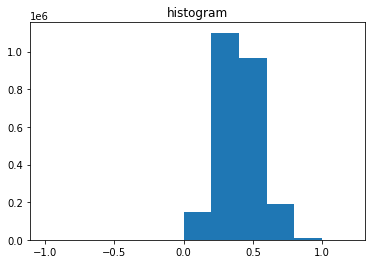

In [20]:
from matplotlib import pyplot as plt 
   
plt.hist(x, bins = [-1,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0,1.2]) 
plt.title("histogram") 
plt.show()

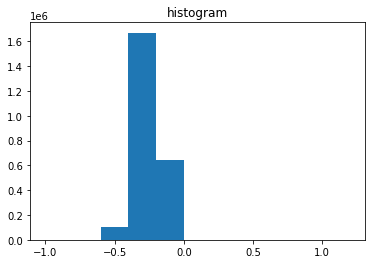

In [21]:
plt.hist(y, bins = [-1,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0,1.2]) 
plt.title("histogram") 
plt.show()

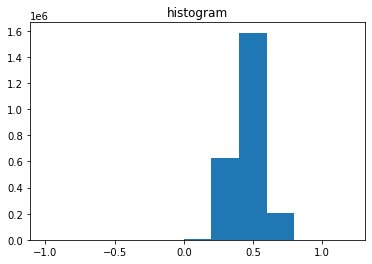

In [22]:
plt.hist(z, bins = [-1,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0,1.2]) 
plt.title("histogram") 
plt.show()